# Exploratory Data Analysis of Global AI Job Market & Salary Trends 2025


AI Job Market Analysis Dataset 2025. Retrieved from Kaggle.com

https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025

Script created 2025-06-05 by PiotrUr

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the ai_job_dataset.csv
df = pd.read_csv("ai_job_dataset.csv")

In [3]:
#Check first rows of dataset
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
#Shape of Dataset
df.shape

(15000, 19)

In [5]:
#Data completeness verification
df.info()
#According to info() function there are no nulls in the dataset and data is complete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [6]:
#Check Statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary_usd,15000.0,115348.965133,60260.940438,32519.0,70179.75,99705.0,146408.5,399095.0
remote_ratio,15000.0,49.483333,40.812712,0.0,0.00,50.0,100.0,100.0
years_experience,15000.0,6.253200,5.545768,0.0,2.00,5.0,10.0,19.0
job_description_length,15000.0,1503.314733,576.127083,500.0,1003.75,1512.0,2000.0,2499.0
benefits_score,15000.0,7.504273,1.450870,5.0,6.20,7.5,8.8,10.0


In [7]:
#Check statistics for non-numerical columns
df.describe(include=[object]).T

,count,unique,top,freq
job_id,15000,15000,AI00001,1
job_title,15000,20,Machine Learning Researcher,808
salary_currency,15000,3,USD,11957
experience_level,15000,4,MI,3781
employment_type,15000,4,FT,3812
company_location,15000,20,Germany,814
company_size,15000,3,S,5007
employee_residence,15000,20,Sweden,790
required_skills,15000,13663,"Python, TensorFlow, PyTorch",17
education_required,15000,4,Bachelor,3789


In [8]:
#List column names for easier picking
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [9]:
#Checking average values by job title
df.groupby(['job_title'],sort=True).mean()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
job_title,,,,,
AI Architect,117436.513619,49.416342,6.498054,1523.970169,7.459533
AI Consultant,113671.870739,49.928977,6.099432,1533.160511,7.445170
AI Product Manager,114680.909825,50.874832,6.086137,1502.460296,7.500942
AI Research Scientist,117897.925926,48.214286,6.403439,1496.533069,7.445238
AI Software Engineer,114273.201531,51.147959,6.227041,1503.077806,7.508929
AI Specialist,120570.758242,49.862637,6.561813,1499.346154,7.550000
Autonomous Systems Engineer,111396.557272,51.158301,6.088803,1498.553411,7.498584
Computer Vision Engineer,113472.707182,52.486188,5.954420,1489.910221,7.518370
Data Analyst,111321.180501,49.670619,5.956522,1476.571805,7.587484


In [10]:
# Grouping Job Titles

role_map = {
    'AI Research Scientist': 'Research & Science',
    'Research Scientist': 'Research & Science',
    'Machine Learning Researcher': 'Research & Science',

    'AI Software Engineer': 'Engineering & Development',
    'AI Specialist': 'Engineering & Development',
    'ML Ops Engineer': 'Engineering & Development',
    'Deep Learning Engineer': 'Engineering & Development',
    'Robotics Engineer': 'Engineering & Development',
    'Computer Vision Engineer': 'Engineering & Development',
    'Autonomous Systems Engineer': 'Engineering & Development',
    'Machine Learning Engineer': 'Engineering & Development',
    'AI Architect': 'Engineering & Development',

    'Data Analyst': 'Data Roles',
    'Data Engineer': 'Data Roles',
    'Data Scientist': 'Data Roles',
    'Principal Data Scientist': 'Data Roles',

    'Head of AI': 'Leadership & Strategy',

    'AI Consultant': 'Product & Business',
    'AI Product Manager': 'Product & Business',

    'NLP Engineer': 'NLP & Specialized AI'
}

df["role_category"] = df["job_title"].map(role_map)

In [11]:
#Since I am the most interested in Data Analyst role, let's check some descriptive statistics for this job title 

df_DA = df[df['job_title'] == 'Data Analyst'].copy()

df_DA.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,759.000000,759.000000,759.000000,759.000000,759.000000
mean,111321.180501,49.670619,5.956522,1476.571805,7.587484
std,57745.818000,40.729134,5.404919,596.743891,1.459638
min,32542.000000,0.000000,0.000000,502.000000,5.000000
25%,69003.000000,0.000000,1.000000,942.000000,6.300000
50%,96074.000000,50.000000,4.000000,1460.000000,7.600000
75%,136232.000000,100.000000,9.000000,2009.000000,8.800000
max,361541.000000,100.000000,19.000000,2497.000000,10.000000


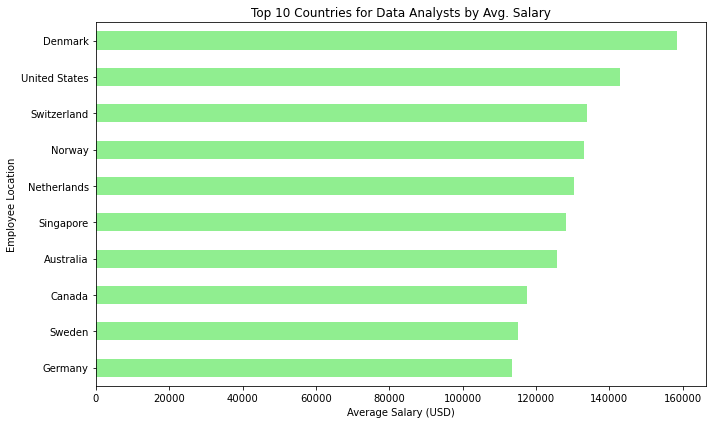

In [12]:
# Groupping data and limiting to the top 10 by average salary
top10 = (
    df_DA.groupby("employee_residence", as_index=False)["salary_usd"]
    .mean()
    .sort_values(by="salary_usd", ascending=False)
    .head(10)
)

# Plotting a chart
top10.sort_values("salary_usd").plot(
    kind="barh", x="employee_residence", y="salary_usd",
    color="lightgreen", figsize=(10, 6), legend=False
)
plt.xlabel("Average Salary (USD)")
plt.ylabel("Employee Location")
plt.title("Top 10 Countries for Data Analysts by Avg. Salary")
plt.tight_layout()

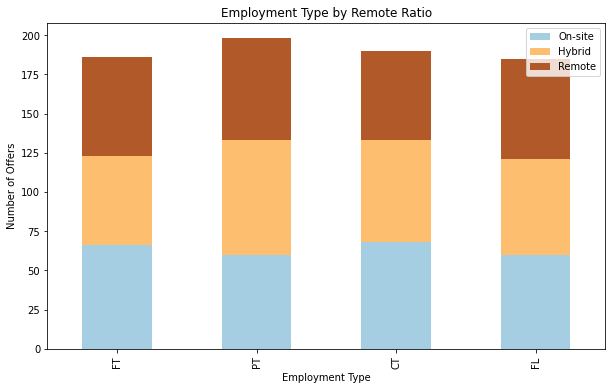

In [13]:
# Groupping by Employment Type and Remote Ratio

remote_summary = df_DA.groupby(["employment_type", "remote_ratio"]).size().unstack()
remote_summary.columns = ['On-site', 'Hybrid', 'Remote']

order = ["FT", "PT", "CT", "FL"]
remote_summary = remote_summary.loc[order]

remote_summary.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title("Employment Type by Remote Ratio")
plt.ylabel("Number of Offers")
plt.xlabel("Employment Type")
plt.show()

# Save Chart as .png file
#plt.savefig("remote_ratio_by_employment_type.png", dpi=300, bbox_inches='tight')

In [14]:
#Adding salary Category

def categorize_salary(salary):
    if salary < 80000:
        return "Low"
    elif salary < 130000:
        return "Medium"
    else:
        return "High"

df_DA["salary_band"] = df_DA["salary_usd"].apply(categorize_salary)

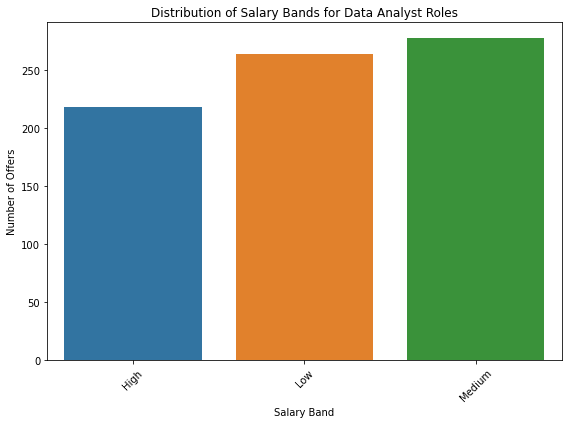

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_DA, x="salary_band", order=sorted(df_DA["salary_band"].unique()))
plt.title("Distribution of Salary Bands for Data Analyst Roles")
plt.xlabel("Salary Band")
plt.ylabel("Number of Offers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

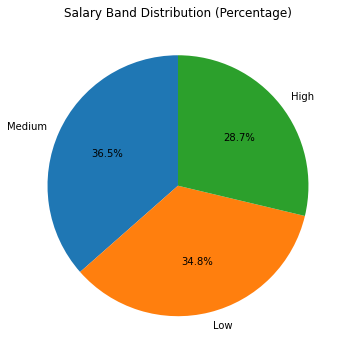

In [16]:
salary_counts = df_DA["salary_band"].value_counts()
salary_percent = salary_counts / salary_counts.sum()

salary_percent.plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title("Salary Band Distribution (Percentage)")
plt.ylabel("")
plt.show()

In [17]:
df['job_title'].unique()

array(['AI Research Scientist', 'AI Software Engineer', 'AI Specialist',
       'NLP Engineer', 'AI Consultant', 'AI Architect',
       'Principal Data Scientist', 'Data Analyst',
       'Autonomous Systems Engineer', 'AI Product Manager',
       'Machine Learning Engineer', 'Data Engineer', 'Research Scientist',
       'ML Ops Engineer', 'Robotics Engineer', 'Head of AI',
       'Deep Learning Engineer', 'Data Scientist',
       'Machine Learning Researcher', 'Computer Vision Engineer'],
      dtype=object)

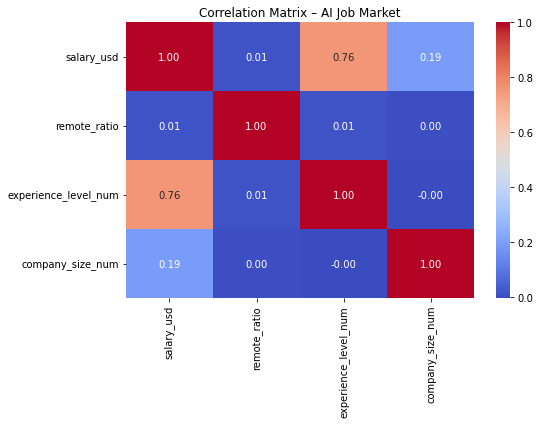

In [18]:
#Correlation Analysis

# Normalizing categorical values:
df_encoded = df.copy()
df_encoded["experience_level_num"] = df_encoded["experience_level"].map({
    "EN": 1, "MI": 2, "SE": 3, "EX": 4
})
df_encoded["company_size_num"] = df_encoded["company_size"].map({
    "S": 1, "M": 2, "L": 3
})

# Selecting only numerical columns
corr_matrix = df_encoded[[
    "salary_usd", "remote_ratio", "experience_level_num", "company_size_num"
]].corr()

# Visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix – AI Job Market")
plt.tight_layout()
plt.show()

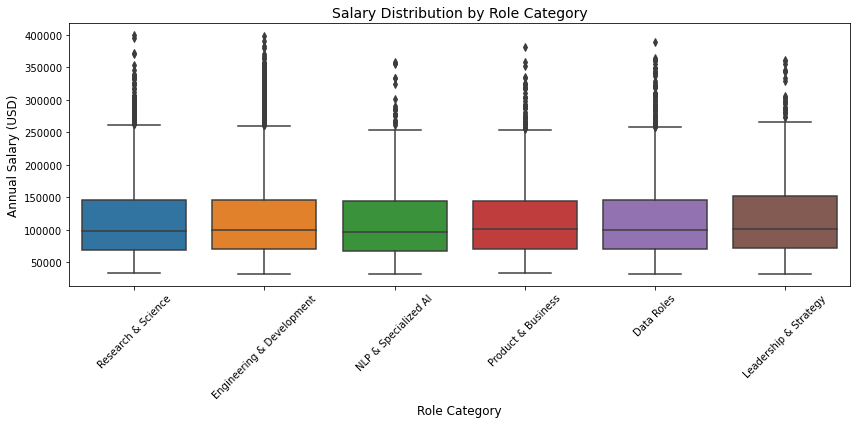

In [22]:
# Adding boxplot to analyze trends by assigned role category

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="role_category", y="salary_usd")

# Chart Formatting
plt.xlabel("Role Category", fontsize=12)
plt.ylabel("Annual Salary (USD)", fontsize=12)
plt.title("Salary Distribution by Role Category", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# It's hard to observe any specific insights form chart above. Trying different data aggregation.

df.groupby('role_category')['salary_usd'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

,mean,median,count
role_category,,,
Leadership & Strategy,118542.968627,102025.0,765
Engineering & Development,115729.184226,99698.0,6758
Research & Science,115459.908500,98705.5,2306
Data Roles,114825.308238,99814.5,2962
Product & Business,114189.988252,100703.0,1447
NLP & Specialized AI,112670.937008,97559.5,762


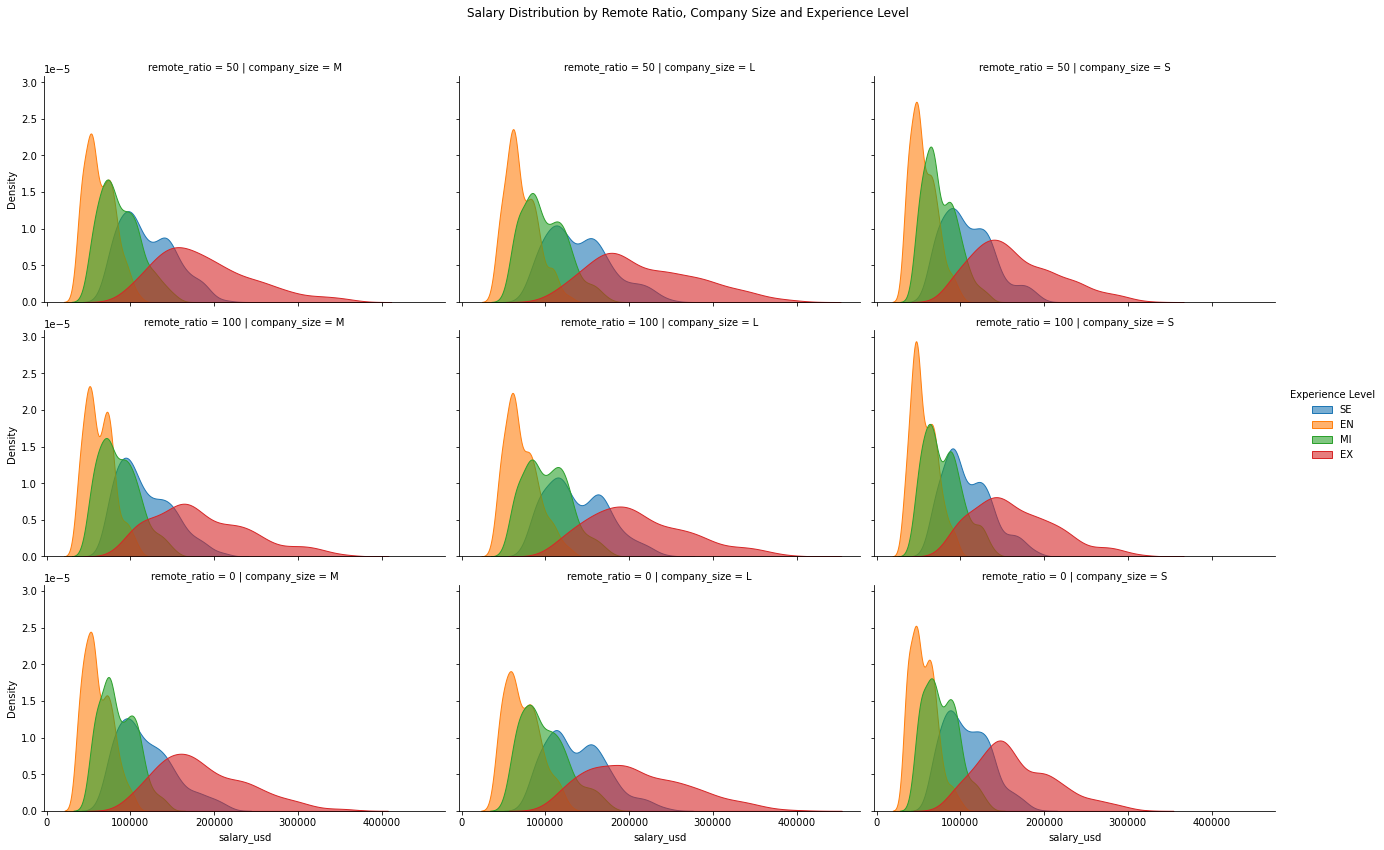

In [24]:
# Creating FacetGrids

#Data Convertion to string

df["remote_ratio"] = df["remote_ratio"].astype(str)
df["company_size"] = df["company_size"].astype(str)
df["experience_level"] = df["experience_level"].astype(str)

# Creating Facet Grid
g = sns.FacetGrid(df, 
                  row="remote_ratio", 
                  col="company_size", 
                  hue="experience_level", 
                  height=4, 
                  aspect=1.5)

# Creating Plot
g.map(sns.kdeplot, "salary_usd", fill=True, common_norm=False, alpha=0.6)

# Formatting
g.add_legend(title="Experience Level")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Salary Distribution by Remote Ratio, Company Size and Experience Level")
plt.show()

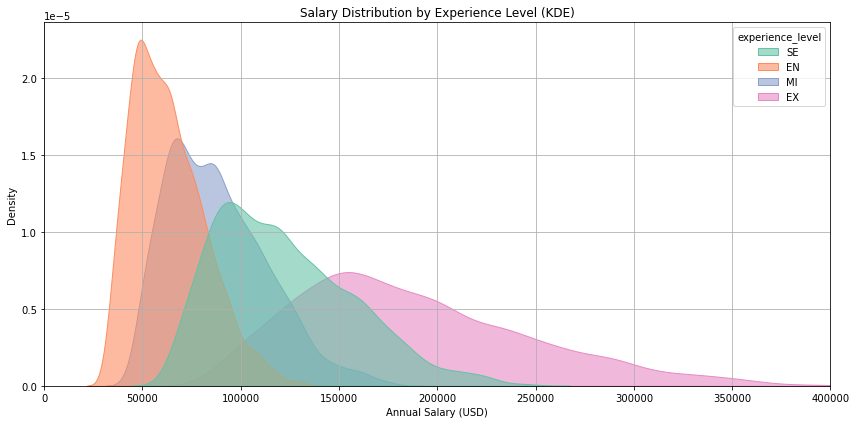

In [25]:
# Salary vs experience level analysis

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df,
    x="salary_usd",
    hue="experience_level",
    common_norm=False,
    fill=True,
    alpha=0.6,
    palette="Set2"
)
plt.title("Salary Distribution by Experience Level (KDE)")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Density")
plt.xlim(0, 400000)
plt.grid(True)
plt.tight_layout()
plt.show()

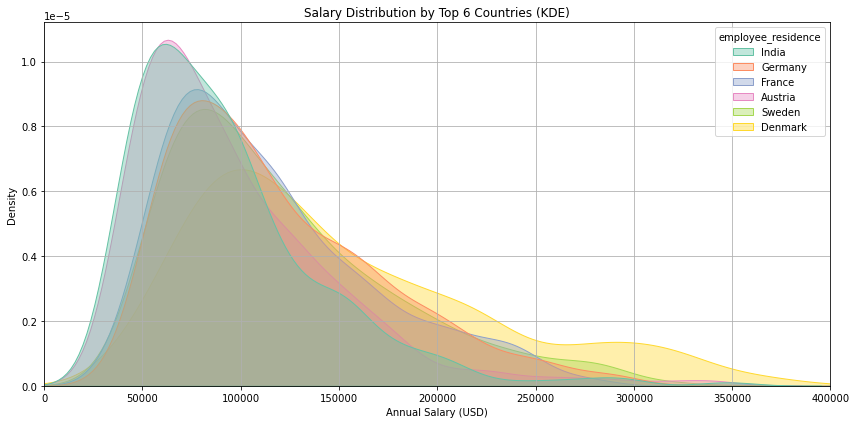

In [26]:
# KDE plot – salary distribution by top 6 countries
top_countries = df['employee_residence'].value_counts().head(6).index
df_top = df[df['employee_residence'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df_top,
    x='salary_usd',
    hue='employee_residence',
    fill=True,
    common_norm=False,
    alpha=0.4,
    palette='Set2'
)
plt.title('Salary Distribution by Top 6 Countries (KDE)')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.xlim(0, 400000)
plt.grid(True)
plt.tight_layout()
plt.show()
